# Example Data Notebook for TAQ Database


In [ ]:
! pip install fabric

In [2]:
from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes
import pandas as pd
import numpy as np
from datetime import datetime
import collections
from itertools import chain
import matplotlib.pyplot as plt

### Personal Details

Below are the details needed to authenticate into the server and crete a client connection

In [14]:
host="ppolak5.ams.stonybrook.edu."
server_user= 'TEMP'
server_password='TEMP'
db_user='TEMP'
db_pass='TEMP'

In [15]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

In [16]:
exchange="N" #nasdaq 
symbol='AAPL'
start= "2020-01-01"
end="2020-01-30"


In [17]:
result=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Trade Query for N AAPL 2020-01-01 2020-01-30


INFO:paramiko.transport:Authentication (password) successful!
/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/clickhouse_sqlalchemy/drivers/base.py:268: SAWarning: Did not recognize type 'DateTime64(9, 'America/New_York')' of column 'Time'
  warn("Did not recognize type '%s' of column '%s'" %
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [ ]:
trades=pd.read_csv('data/AAPL_trades.csv')
trades=clean_trades(trades)
trades.to_csv('data/AAPL_trades.csv')
trades

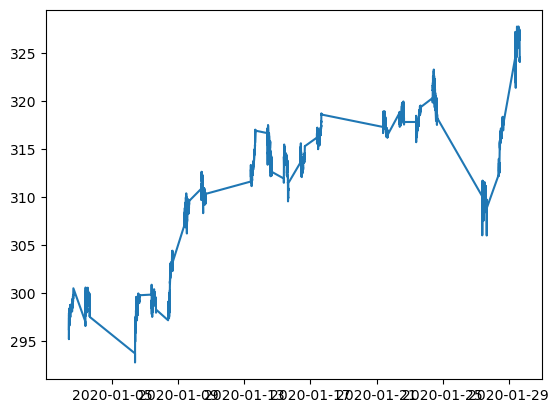

In [8]:
plt.plot(trades['Trade_Price'])

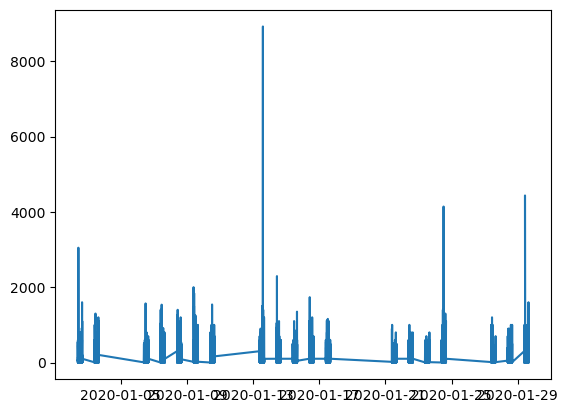

In [9]:
plt.plot(trades['Trade_Volume'])

### Example Quote Query

In [5]:
exchange="N"
symbol='AAPL'
start= "2020-01-01"
end="2020-01-03"


In [6]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

In [7]:
result=conn.client_get_quotes(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Quote Query for N AAPL 2020-01-01 2020-01-03


INFO:paramiko.transport:Authentication (password) successful!
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [8]:
quotes=pd.read_csv('data/AAPL_quotes.csv')
quotes=clean_quotes(quotes)
quotes.to_csv('data/AAPL_quotes.csv')

In [11]:
quotes

,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,FINRA_BBO_Indicator,...,Best_Offer_Price,Best_Offer_Size,Best_Offer_FINRA_Market_Maker_ID,LULD_Indicator,LULD_NBBO_Indicator,SIP_Generated_Message_Identifier,Participant_Timestamp,FINRA_ADF_Timestamp,Security_Status_Indicator,date
2020-01-02 09:30:03.297207,2020-01-02 09:30:03.297207,N,AAPL,295.70,1.0,296.75,6.0,R,37,NaN,...,296.26,2.0,NaN,NaN,A,NaN,75001344,0,,2020-01-02
2020-01-02 09:30:05.489581,2020-01-02 09:30:05.489581,N,AAPL,296.14,4.0,296.75,5.0,R,109,NaN,...,296.19,4.0,NaN,NaN,A,NaN,2267377152,0,,2020-01-02
2020-01-02 09:30:05.664062,2020-01-02 09:30:05.664062,N,AAPL,295.70,1.0,296.75,5.0,R,140,NaN,...,296.16,2.0,NaN,NaN,A,NaN,2441856512,0,,2020-01-02
2020-01-02 09:30:06.279237,2020-01-02 09:30:06.279237,N,AAPL,294.05,1.0,296.12,2.0,R,130,NaN,...,296.07,4.0,NaN,NaN,A,NaN,3057030912,0,,2020-01-02
2020-01-02 09:30:14.711372,2020-01-02 09:30:14.711372,N,AAPL,295.12,1.0,295.74,1.0,R,167,NaN,...,295.74,1.0,NaN,NaN,A,NaN,2899234816,0,,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 15:59:41.175774,2020-01-02 15:59:41.175774,N,AAPL,300.41,2.0,300.66,1.0,R,81,NaN,...,300.44,4.0,NaN,NaN,A,NaN,3797782272,0,,2020-01-02
2020-01-02 15:59:46.114358,2020-01-02 15:59:46.114358,N,AAPL,300.29,3.0,300.46,1.0,R,24,NaN,...,300.46,2.0,NaN,NaN,A,NaN,146432256,0,,2020-01-02
2020-01-02 15:59:50.119320,2020-01-02 15:59:50.119320,N,AAPL,300.29,3.0,300.66,1.0,R,171,NaN,...,300.40,4.0,NaN,NaN,A,NaN,4151391744,0,,2020-01-02
2020-01-02 15:59:52.914082,2020-01-02 15:59:52.914082,N,AAPL,300.29,3.0,300.66,1.0,R,116,NaN,...,300.39,2.0,NaN,NaN,A,NaN,2651189248,0,,2020-01-02


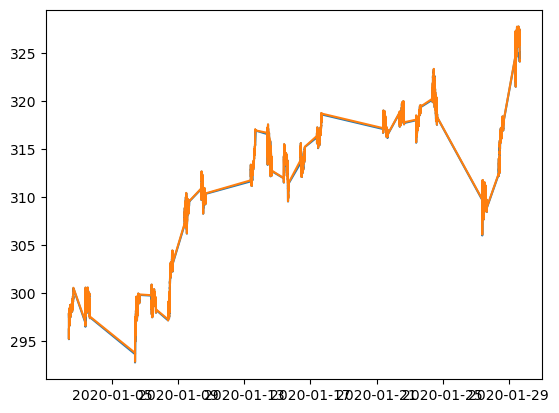

In [14]:
plt.plot(quotes['Best_Bid_Price'],label='Bid')
plt.plot(quotes['Best_Offer_Price'],label='Offer' )

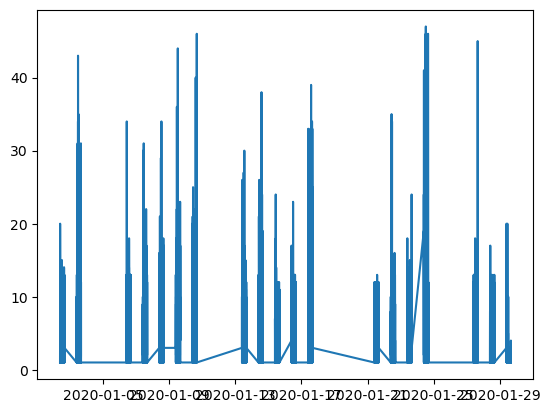

In [15]:
plt.plot(quotes['Bid_Size'],label='Bid Size')
